# Give Me Some Credit

In [1]:
import pandas
import matplotlib
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline  

# Preprocessing Data

## Load Data

In [2]:
train_data = pandas.read_csv("cs-training.csv")
test_data = pandas.read_csv("cs-test.csv")

In [3]:
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


## Standard Scaling

In [5]:
# SeriousDlqin2yrs is label in training data so we discard first 2 columns
feature_cols = train_data.columns[2:]
# User StandardScaler to scale range of feature
scaler = preprocessing.StandardScaler()
train_data[feature_cols] = scaler.fit_transform(train_data[feature_cols])
test_data[feature_cols] = scaler.transform(test_data[feature_cols])

## Fill Nan with Mean

In [6]:
# Fill na with training data's mean for nan
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(train_data.mean(), inplace=True)

## Oversampling

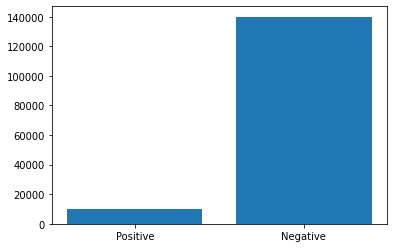

In [8]:
# Check unbalanced problem
positive = train_data[train_data["SeriousDlqin2yrs"]==1]
negative = train_data[train_data["SeriousDlqin2yrs"]==0]
count =  [len(positive), len(negative)]
labels =  ["Positive","Negative"]
plt.bar(labels, count)
plt.show()

In [9]:
# Oversample 
over_sample_ratio = len(negative) / len(positive)
print("Ratio", over_sample_ratio)
train_data = pandas.concat([positive for i in range(int(over_sample_ratio))] + [negative])
train_label = pandas.concat([positive for i in range(int(over_sample_ratio))] + [negative])
train_data.describe()

Ratio 13.961101137043686


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000,270312.000000
mean,75202.187650,0.482176,-0.002996,-0.191891,0.208857,-0.012643,-0.026807,-0.049340,0.194866,-0.011705,0.170064,0.074871
std,43322.662576,0.499683,0.823974,0.970095,2.023691,0.848213,0.717240,1.046488,2.035841,1.124206,2.037551,1.034550
min,1.000000,0.000000,-0.024218,-3.540201,-0.100419,-0.173228,-0.463705,-1.642610,-0.063793,-0.901283,-0.057852,-0.679073
25%,37854.000000,0.000000,-0.023940,-0.900039,-0.100419,-0.173138,-0.220390,-0.865297,-0.063793,-0.901283,-0.057852,-0.679073
50%,75120.500000,0.000000,-0.022518,-0.223074,-0.100419,-0.173035,-0.046593,-0.282312,-0.063793,-0.016145,-0.057852,-0.679073
75%,112682.000000,1.000000,-0.020478,0.453891,0.138087,-0.172794,0.011316,0.495001,-0.063793,0.868993,-0.057852,0.217722
max,150000.000000,1.000000,203.007128,3.838715,23.273165,161.600304,208.700747,9.628425,23.441408,46.896174,23.527249,17.256824


In [10]:
train_label = train_data["SeriousDlqin2yrs"]
train_data = train_data[feature_cols]
test_data = test_data[feature_cols]

# Model Training

In [11]:
# Use cross validation in here to tune models
# Due to time limit, I don't do too much tuning or using GridSearchCV
# In here, we use AUC because competetion uses AUC as metic
kf = StratifiedKFold(n_splits=10)
for train_index, valid_index in kf.split(train_data, train_label):
    train_X = train_data.iloc[train_index]
    train_y = train_label.iloc[train_index]
    valid_X = train_data.iloc[valid_index]
    valid_y = train_label.iloc[valid_index].to_numpy()
    # Test different models
    # clf = LogisticRegression(random_state=0, C=1).fit(X, y)
    # clf = SVC(probability=True).fit(X, y)
    # clf = RandomForestClassifier(max_depth=5, random_state=0).fit(X, y)
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0).fit(train_X, train_y)
    # Calculate AUC for training data
    pred_y = clf.predict_proba(train_X)
    train_auc = roc_auc_score(train_y, pred_y[:, 1])
    # Calculate AUC for validation data
    pred_y = clf.predict_proba(valid_X)
    valid_auc = roc_auc_score(valid_y, pred_y[:, 1])
    
    print("train AUC: {}, valid AUC: {}".format(train_auc, valid_auc))

train AUC: 0.9066124446350312, valid AUC: 0.8976743685495043
train AUC: 0.9053225944526495, valid AUC: 0.8997287129709646
train AUC: 0.9059650582274477, valid AUC: 0.8993728313666021
train AUC: 0.9067325672538664, valid AUC: 0.9022921202047627
train AUC: 0.9056425273657223, valid AUC: 0.8982678383404656
train AUC: 0.9078921310553862, valid AUC: 0.9024453841568827
train AUC: 0.9069361401125806, valid AUC: 0.9023650193833048
train AUC: 0.9065731790891851, valid AUC: 0.899085323737526
train AUC: 0.9065452299030983, valid AUC: 0.9024108512525828
train AUC: 0.9063603057080116, valid AUC: 0.9018648102516909


# Predict Test

In [12]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0).fit(train_data, train_label)

In [13]:
pred_y = clf.predict_proba(test_data)
f = open("result.csv", "w")
f.write("Id,Probability\n")
for i, p in enumerate(pred_y[:, 1]):
    f.write("{},{}\n".format(i + 1, p))
f.close()